**WORK IN PROGRESS**

# Rationale

Sepsis is a life-threatening condition that arises when a patient's immune system responds to an infection in a disproportionate manner [(Mayo Clinic 2019)](https://www.mayoclinic.org/diseases-conditions/sepsis/symptoms-causes/syc-20351214). This causes the release of numerous hormones and related chemical responses in the body that can lead to tissue damage, which, if left untreated, can lead to organ failure and death [(Sepsis Alliance 2019)](https://www.sepsis.org/sepsis-basics/what-is-sepsis/). 

Early recognition of uncomplicated sepsis (i.e. no organ dysfunction) in patients presenting to Emergency Departments is associated with improved patient outcomes [(Seymour et al. 2017)](https://www.ncbi.nlm.nih.gov/pubmed/28528569). A recent study showed that an active alert system reduced inpatient mortality and morbidity on a large scale [(Honeyford et al. 2019)](https://academic.oup.com/jamia/advance-article/doi/10.1093/jamia/ocz186/5607431). This system made use of real time patient information to detect sepsis and alert healthcare givers to provide prompt treatment, leading to lower odds of death (OR: 0.76; 95%CI: 0.70-0.84). A similar system in Irish Emergency Departments could prove valuable, particularly given the ongoing 'trolley crisis' [(Halpin & Thomas 2019)](https://www.thejournal.ie/woman-70-left-for-105-hours-on-trolley-in-limerick-hospital-4832123-Oct2019/) and its association with increased patient mortality at 10 days [(Richardson 2006)](https://www.mja.com.au/system/files/issues/184_05_060306/ric10511_fm.pdf). 

# Aim

This notebook sets out the development of a dataset of simulated patients attending an Irish ED with uncomplicated sepsis. 

# Assumptions

1. In order for sepsis to be present, an infective source needs to be present. It will be assumed that if any of the patients within the dataset fulfill the criteria for sepsis, that they have a likely infective source


2. The dataset will only make use of clinical parameters that can be measured at presentation; that is, laboratory parameters will not be included in the dataset. The 'general variables' presented in Appendix 7 of the National Clinical Effectiveness Committee's Sepsis Managament National Clinical Guideline No. 6 [(National Clinical Effectiveness Committee 2014)](https://assets.gov.ie/11620/4678fb449336482fb291a140ef67e570.pdf) will be the only variables of interest included in the dataset. These are as follows
    1. Temperature <36 or >38.3 degrees celsius
    2. Heart rate >90 beats per minute
    3. Respiratoty rate >20 breaths per minute
    4. Altered mental state, recorded as 'Yes' or 'No'
    5. Blood glucose level of >7.7 mmol/L in non-diabetic 
    
    
3. Patients with co-morbidities (e.g. diabetes, compromised immune system, etc) are at increased risk of developing sepsis [(Sepsis Alliance 2019)](https://www.sepsis.org/sepsis-basics/what-is-sepsis/). For the sake of this dataset, it will be assumed that no patient has a co-morbidity or prior medical history that places them at increased risk of developing uncomplicated sepsis.


4. Only patients between 18 and 65 years of age will be included in the dataset. Children have different physiological parameters than adults, and thus different cut-offs for defining sepsis [(Mathias, Mira and Larson 2016)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4913352/pdf/nihms790779.pdf). Adults over the age of 65 are more likely to have multiple co-morbidities [(Barnett et al 2012)], and thus including this population in the dataset will not accurately reflect a 'real' population. 


5. Gender will not be part of the dataset. Although gender is associated with outcomes in patients with *developed* sepsis, there is insufficient evidence that gender is a risk factor for *developing* sepsis [(McNevin et al. 2016)](http://imj.ie/3171-2/).

# Developing the dataset parameters

In [67]:
# Import necessary packages to create and plot dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Increase plot production image sizes
plt.rcParams["figure.figsize"] = (10,5)

The first step in developing a dataset of ED patients with uncomplicated sepsis is developing a population with 'normal' vital sign parameters. Once this dataset is created, patients are randomly selected from within this dataset and 'given' a diagnosis of sepsis with appropriate changes to their physiological parameters. The final dataset then contains a simulated population of ED patients, of which an appropriate random proportion will have uncomplicated sepsis based on vital sign changes as mentioned above. 

## Creating the 'normal' ED population

### Size
According to the Central Statistics Office (CSO) [(Central Statistics Office 2011)](https://www.cso.ie/en/media/csoie/releasespublications/documents/labourmarket/2010/healthstatusq32010.pdf), 10% of the adult Irish population over 18 years of age attended an ED. Based on the 2016 census [(Central Statistics Office 2018)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EY007&PLanguage=0), the population of Ireland >18 years of age was estimated at 3,424,795. This equates to roughly 9,383 A&E visits across the country every day. However, the 10% CSO statistic includes repeat presentations; a report compiled by the HSE in 2006 [(HSE 2006)](https://www.hse.ie/eng/services/publications/hospitals/hse-emergency-departments--patient-profiles,-experiences-and-perceptions.pdf) placed this figure closer to 3,300. For the interest of this database, we will work with a daily ED attendance number of 3,500. 

### Age distribution
Presentations to ED are not evenly distributed across age categories, with a bimodal presentation at 18-24 years of age, and 70+ [(Central Statistics Office 2011)](https://www.cso.ie/en/media/csoie/releasespublications/documents/labourmarket/2010/healthstatusq32010.pdf). A bimodal distribution of this type can be represented by two normal distributions [(Ho 2018)](https://medium.com/@michellemho/faking-data-87c063cf38a7) centred around a mean of 18 and 70 respectively, with a standard deviation (SD) of 15 for each. This SD allows for ~95% of the sample from each distribution to arise between two SD from the mean. Although this does not make biological sense for the mean of 18 (2 SD of 15 years below 18 years will be equal to minus 12 years), it does ensure that there is overlap between the two distributions in the middle (between ~40 and ~48 years of age) as shown in the following plot: 


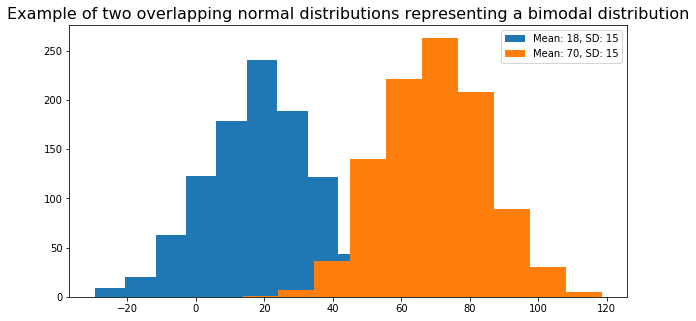

In [68]:
# Generate two normal distributions of 1,750 values, young and old, with mean of 18 and 70 respectively, 
# and standard deviation of 15
y = np.random.normal(18, 15, 1000)
o = np.random.normal(70, 15, 1000)

# Plot histograms of the two distributions on the same plot
plt.hist(y, label="Mean: 18, SD: 15")
plt.hist(o, label="Mean: 70, SD: 15")
# Add plot details
plt.title("Example of two overlapping normal distributions representing a bimodal distribution", fontsize=16)
plt.legend()

Thus, two normal distributions provide a bimodal distribution that represents the desired distribution as it occurs in reality. As there is roughly an equal proportion of attendees in the 18-24 age bracket (13%) and the 70+ age bracket (11%) [(Central Statistics Office 2011)](https://www.cso.ie/en/media/csoie/releasespublications/documents/labourmarket/2010/healthstatusq32010.pdf), an equal proportion from each distribution is sampled in this dataset.

### Vital signs

#### Temperature, heart rate and respiratory rate
The normal values for these vital signs are as follows [(National Institutes of Health 2019)](https://medlineplus.gov/ency/article/002341.htm):
- temperature: 36.5 to 37.3 degrees celsius
- heart rate: 60 to 100 beats per minute
- respiratory rate: 12 to 18 breaths per minute

For the purpose of this dataset, it is assumed that these values are normally distributed. Individual patient vital signs are thus calculated from within these ranges by selecting a random value from a normal distribution centred around the middle value (median) of the range, with a SD equal to the interquartile range (IQR) divided by 1.35 [(Researchgate 2014)](https://www.researchgate.net/post/Is_there_any_way_to_get_mean_and_SD_from_median_and_IQR_interquartile_range). In this instance, the IQR is considered equal to the range between the lowest/highest value and the median. Thus, for example, the mean and SD for the normal sampling distribution of temperature is calculated as follows:
 - mean = median = (37.3 + 36.5)/2 = 36.9
 - SD = IQR/1.35 = (36.9 - 36.5)/1.35 = 0.3

#### Blood glucose level
Blood glucose level is dependent on time since last meal [(Diabetes.co.uk 2019)](https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html), and normal is considered any value within the following range:
- 4.0 (fasting) to 7.7mmol/L (post-prandial)

Calculation of values for this variable are performed in the same manner as the above continuous variables.  

#### Mental state
There are many ways of measuring mental status in the Emergency Department [(Xiao et al. 2012)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4129809/pdf/WJEM-3-270.pdf). For that reason, no single scale is defined for this variable. Instead, this is a binary variable: mental status is either altered ('yes') or normal ('no'). This variable is initially set at 'no'.

### Sepsis
The variable of sepsis is defined as either absent ('no') or present ('yes'). This variable is initially set as 'no' to reflect the initial non-septic population

## Creating sepsis patients within the 'normal' ED population

### Proportion with sepsis

According to a study conducted in one of the busiest EDs in Ireland [(McNevin et al. 2016)](http://imj.ie/3171-2/), roughly 4.24% of ED presentations fulfill the criteria for uncomplicated sepsis. This proportion is not evenly distributed across age brackets, with older patients more likely to have sepsis (median age 45 years without sepsis versus 65 years for those with sepsis). In order to accurately reflect this, 4% of the 'normal' population dataset between the ages of 50 and 65 will be randomly selected to have sepsis. A remaining 0.5% will be randomly selected from the *complete* 'normal' population to reflect the possibility of sepsis arising at any age.

### Vital signs of septic patients
In order for a patient to be diagnosed with uncomplicated sepsis, they need to have 2 or more abnormal vital signs. However, the probability of an increasing number of abnormal vital signs decreases with each additional vital sign as follows [(McNevin et al. 2016)](http://imj.ie/3171-2/): 

Number | Probability 
--- | ---
 2 | 55% 
 3 | 36% 
 4 | 7% 
5 | 2% 

To accurately represent this decreasing probability, the number of vital signs to adjust is randomly selected from between 2 to 5 using the numpy `random.choice` module, with probability for the value decreasing in line with the probabilities in the table above. This value is then used to determine how many of the five vital signs to adjust (temperature, heart rate, respiratory rate, blood glucose level, mental state) by randomly drawing an equal number of 

#### Temperature


Selecting number of vitals to change - not evenly distributed. Proportion decreases with following p:
2 - 55% of patients
3 - 36%
4 - 7%
5 - 2%
Need to reflect this in numbers

(array([  4.,  21.,  71., 208., 313., 419., 294., 124.,  38.,   8.]),
 array([35.84083126, 36.04240033, 36.24396941, 36.44553848, 36.64710755,
        36.84867662, 37.0502457 , 37.25181477, 37.45338384, 37.65495291,
        37.85652199]),
 <a list of 10 Patch objects>)

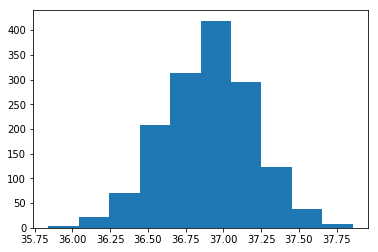

In [54]:
test = np.random.normal(36.9, 0.3, 1500)
plt.hist(test)

In [108]:
# Create counter and population size
count = 0
pop = 3500

# Create list of ages (this will be converted to a dataframe for analysis in due course)
ages = []

# Generate a random list of 3,500 ages from a bimodal distribution
# Run through the random samples as they are generated, and only add ages > 18 and < 75 to the list
while count < pop:
    yng = int(np.random.normal(18, 15)) # Young normal distribution centred around a mean of 15, SD of 15
    # print(yng)
    old = int(np.random.normal(70, 15)) # Old normal distribution centred around a mean of 70, SD of 15
    # print(old)
    if yng < 18:
        continue
    if old > 65:
        continue
    else:
        ages.append(yng)
        ages.append(old)
        count += 2 # Increment count by 2 each time for yng and old age addition

(array([111., 626., 440., 393., 247., 389., 551., 634., 108.,   1.]),
 array([12. , 18.6, 25.2, 31.8, 38.4, 45. , 51.6, 58.2, 64.8, 71.4, 78. ]),
 <a list of 10 Patch objects>)

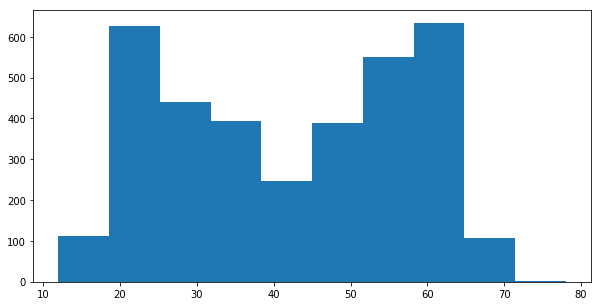

In [109]:
# Plot list to confirm bimodal distribution
plt.hist(ages)

For the purposes of this equation, the mean for each value (apart from mental state) will be the median of the ranges shown. The standard deviation (SD) will be 1/3 the value between the median and the lower/upper limit of the range. This will ensure that 99% of values chosen are within the ranges shown. As a normal distribution is asymptotic, additional conditionals will be employed to ensure all values fall between the ranges as shown.

[1]: https://medlineplus.gov/ency/article/002341.htm
[2]: https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html

In [81]:
sd = abs(round((36.5-37.3)/1.35, 2))
sd

0.59

In [82]:
'''Create values function to select values from normal range:
    Takes 3 arguments type integer or float:
                        a = lower range limit
                        b = upper range limit
                        size = population size
    Returns a list of values from a normal distribution between a and b of size 'size' '''


def values(a, b, size): # a and b are range limits; size is population size
    # calculate mean
    mn = abs(round((a+b)/2, 2))
    #print(mn)
    
    # calculate sd
    sd = abs(round((mn-a)/1.35, 2))
    #print(sd)
    
    # set counter
    count = 0
    
    # create empty list
    ls = []
    
    # determine values
    while count < size:
        x = (np.random.normal(mn, sd))
        if x < a or x > b:
            continue
        else:
            ls.append(x)
            count += 1
        
    # return list
    return ls

In [83]:
# Create lists of normal vital signs
temp = values(36.5, 37.3, pop)
hr = values(60, 100, pop)
rr = values(12, 18, pop)
gluc = values(4.0, 7.7, pop)

Text(0, 0.5, 'Count')

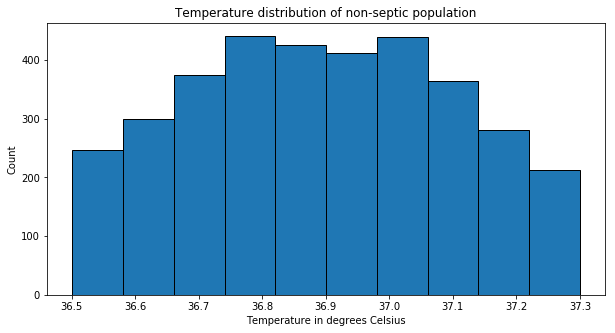

In [84]:
# Plot temp
plt.hist(temp, edgecolor='k')
plt.title('Temperature distribution of non-septic population')
plt.xlabel('Temperature in degrees Celsius')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

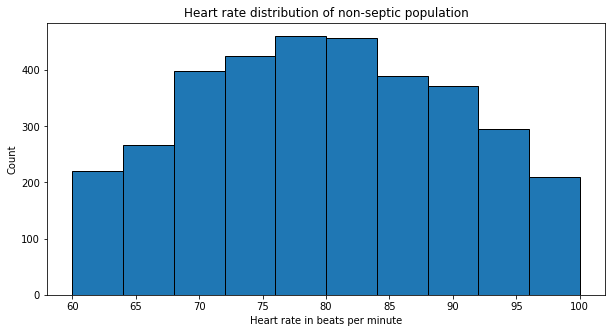

In [85]:
# Plot hr
plt.hist(hr, edgecolor='k')
plt.title('Heart rate distribution of non-septic population')
plt.xlabel('Heart rate in beats per minute')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

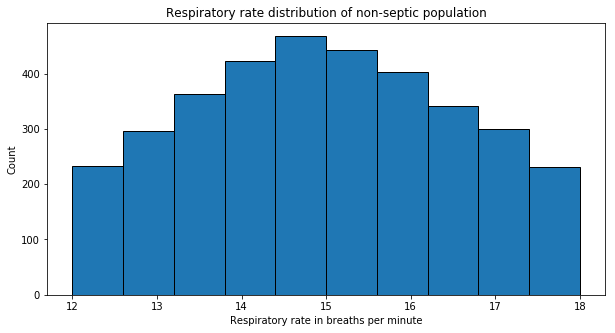

In [86]:
# Plot rr
plt.hist(rr, edgecolor='k')
plt.title('Respiratory rate distribution of non-septic population')
plt.xlabel('Respiratory rate in breaths per minute')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

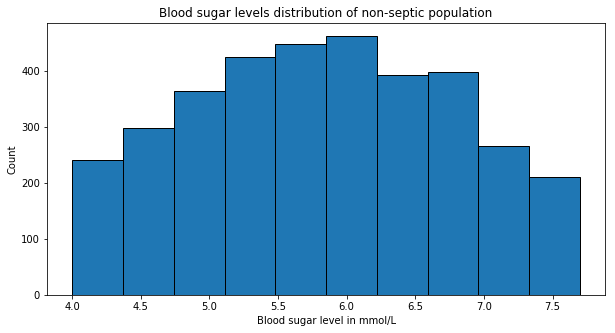

In [87]:
# Plot gluc
plt.hist(gluc, edgecolor='k')
plt.title('Blood sugar levels distribution of non-septic population')
plt.xlabel('Blood sugar level in mmol/L')
plt.ylabel('Count')

In [88]:
# Create dataframe of 'normal' patient values - https://stackoverflow.com/a/30522778
df = pd.DataFrame({'age': ages, 'temp': temp, 'pulse': hr, 'resp_rate': rr, 'sugar': gluc})

In [89]:
# Round values appropriately - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html
df = df.round({'temp': 1, 'pulse': 0, 'resp_rate': 0, 'sugar': 1})

In [90]:
# Convert pulse and resp rate float columns to integers - https://stackoverflow.com/a/21291622
df.pulse = df.pulse.astype(int)
df.resp_rate = df.resp_rate.astype(int)

In [91]:
# Add in the mental status column with all values at 'No' - https://www.interviewqs.com/ddi_code_snippets/add_new_col_df_default_value
df['alt_ment'] = 'no'

# Add in sepsis column with all values at 'no'
df['sepsis'] = 'no'

In [92]:
# Confirm that values entered of correct type
print(df.dtypes)

age            int64
temp         float64
pulse          int64
resp_rate      int64
sugar        float64
alt_ment      object
sepsis        object
dtype: object


In [93]:
# Confirm dataframe stored correctly
df.head()

,age,temp,pulse,resp_rate,sugar,alt_ment,sepsis
0,35,37.0,72,15,5.8,no,no
1,51,36.7,78,13,4.6,no,no
2,26,36.6,95,13,5.8,no,no
3,41,36.6,80,14,4.7,no,no
4,52,36.7,76,15,4.6,no,no


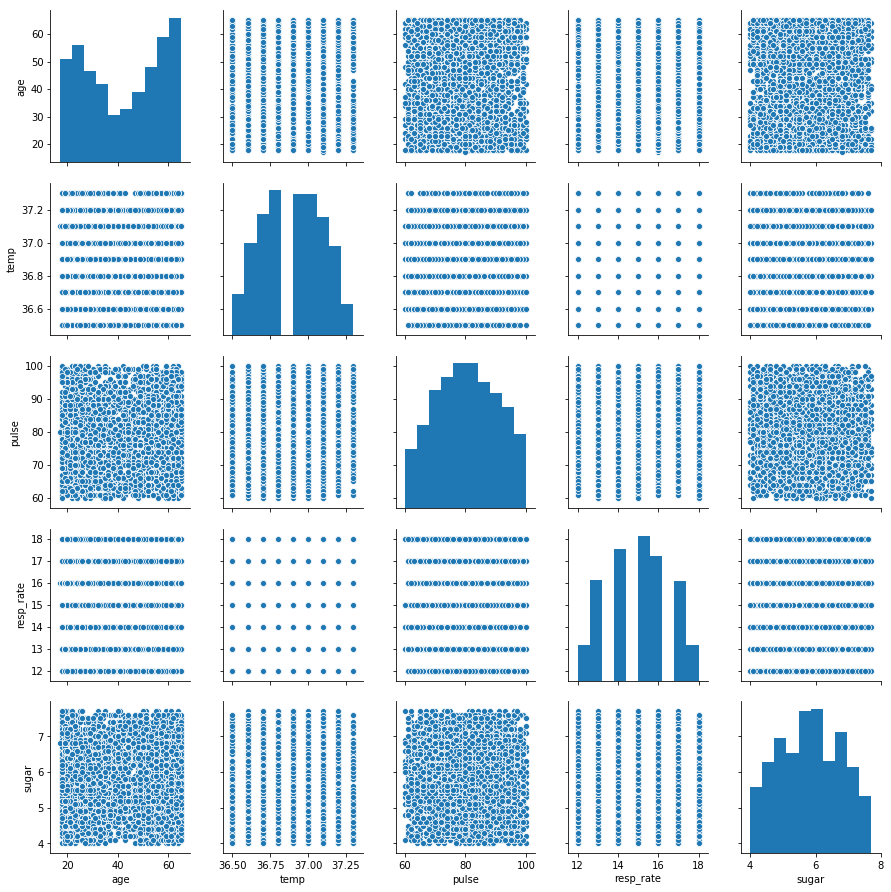

In [94]:
import seaborn as sns
sns.pairplot(df)

In [20]:
df.describe()

,age,temp,pulse,resp_rate,sugar
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.471143,36.899314,79.900857,14.972286,5.852486
std,18.399275,0.229391,11.320938,1.759497,1.026203
min,18.000000,36.500000,60.000000,12.000000,4.000000
25%,28.000000,36.700000,70.000000,14.000000,5.000000
50%,45.000000,36.900000,80.000000,15.000000,5.800000
75%,63.000000,37.100000,90.000000,16.000000,6.700000
max,75.000000,37.300000,100.000000,18.000000,7.700000


##### Create sepsis patients
According to a [study][1] conducted in one of the busiest EDs in Ireland, roughly 4.24% of ED presentations are suffering from sepsis. This proportion is not evenly distributed, with older patients more likely to have sepsis (median 45 without sepsis versus a median of 65 for those with sepsis). In order to accurately reflect this, we will randomly select 4% of the sample between the ages of 50 and 65 to have sepsis. We will then select 0.5% from the remaining sample to have sepsis to represent the possibility of sepsis at all ages.

All samples drawn from uniform distribution. Why not normal? As mean unknown, don't know if these samples are skewed. And what is the SD? However, is possible to calculate this from median ans IQR if assumed normal distribution - mean = median, SD = IQR/1.35 (https://www.researchgate.net/post/Is_there_any_way_to_get_mean_and_SD_from_median_and_IQR_interquartile_range)

Median hearbeat from study - 104, IQR 89-113. Thus, draw from range 91 to 130 (IQR between median and IQR is 15. Assuming that additional 15 on top end is complete range of study, thus 130).

Temp - median of 36.7, IQR of 36 to 38. Thus, applying above logic again, upper end of range is 39.3, lower end of range is 36 - 0.7 = 35.3. Need to select randomly from lower (<36) or upper range (>38.3).

Median resp rate was 18, IQR 16-20. Thus, applying same principle as above, range is 14-22. Only rr > 20 is indicative. 

Sugar median was 7.6, IQR 6-9 mmol/L. thus, applying same above principle, range is 4.4 - 10.4. Thus, sepsis is range 7.8 to 10.4

In [21]:
# Create proportion of sample
older = int(pop*0.04)
rest = int(pop*0.005)

In [22]:
def sepsis(a, b): # a is the df row; b is the number of variables to change
    vitals = np.array(['temp', 'pulse', 'resp_rate', 'sugar', 'alt_ment']) # https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html
    for i in range(b):
    # Randomly select variables to change
        vc = np.random.choice(vitals)
        vitals = vitals[vitals!=vc] # https://thispointer.com/delete-elements-from-a-numpy-array-by-value-or-conditions-in-python/
        # print(vc)
        # print(vitals)
        if vc == 'pulse':
            a.at[:, 'pulse'] = np.random.randint(91, 131) # https://www.edureka.co/community/43220/how-to-change-update-cell-value-in-python-pandas-dataframe
            # print(a)
        if vc == 'temp':
            # decide on random upper or lower limit using binomial distribution
            dec = np.random.binomial(1, 0.5)
            if dec == 1:
                a.at[:, 'temp'] = np.random.choice(np.arange(38.3, 39.4))
            else:
                a.at[:, 'temp'] = np.random.choice(np.arange(35.3, 36.1))
            # print(a)
        if vc == 'resp_rate':
            a.at[:, 'resp_rate'] = np.random.randint(21, 23)
            # print(a)
        if vc == 'sugar':
            a.at[:, 'sugar'] = np.random.choice(np.arange(7.8, 10.5))
            # print(a)
        if vc == 'alt_ment':
            a.at[:, 'alt_ment'] = 'yes'
            # print(a)
    a.at[:, 'sepsis'] = 'yes'  
    #print(a)

Selecting number of vitals to change - not evenly distributed. Proportion decreases with following p:
2 - 55% of patients
3 - 36%
4 - 7%
5 - 2%
Need to reflect this in numbers

In [23]:
# Create loop to change proportion of sample

# Reset counter
count = 0

# Run through older proportion of sample 
while count < older:
    # Choose observation randomly, but over 50
    x = df.loc[df.age >= 50].sample() # https://www.pybloggers.com/2018/11/how-to-use-pandas-sample-to-select-rows-and-columns/
    # print(x)
    if (x['sepsis'] == 'yes').bool(): # https://stackoverflow.com/a/36922103
        continue
    # Randomly determine number of vital signs to change - 2, 3, 4, or 5 - with reducing probability - https://stackoverflow.com/a/4266645
    num = np.random.choice(np.arange(2, 6), p=[0.55, 0.36, 0.07, 0.02])
    # print(num)
    # Adjust the corresponding number of vital signs using the sepsis function
    sepsis(x, num)
    df = df.append(x) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
    # print(x)
    count += 1
    # print(count) 

In [24]:
# Run through rest of sample

# Reset count
count = 0 

# Run through rest of sample
while count < rest: 
    # Choose observation randomly
    x = df.sample() # https://www.pybloggers.com/2018/11/how-to-use-pandas-sample-to-select-rows-and-columns/
    # print(x)
    if (x['sepsis'] == 'yes').bool(): # https://stackoverflow.com/a/36922103
        continue
    # Randomly determine number of vital signs to change - 2, 3, 4, or 5 - with reducing probability - https://stackoverflow.com/a/4266645
    num = np.random.choice(np.arange(2, 6), p=[0.55, 0.36, 0.07, 0.02])
    # print(num)
    # Adjust the corresponding number of vital signs using the sepsis function
    sepsis(x, num)
    df = df.append(x) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
    # print(x)
    count += 1
    # print(count) 

In [25]:
df = df.loc[~df.index.duplicated(keep='last')] # https://stackoverflow.com/a/34297689

In [26]:
df

,age,temp,pulse,resp_rate,sugar,alt_ment,sepsis
0,54,37.0,84,16,4.0,no,no
2,40,36.7,78,18,5.0,no,no
3,58,36.6,96,15,6.6,no,no
4,45,36.7,97,17,5.1,no,no
6,26,36.7,75,15,4.2,no,no
8,22,37.1,99,15,6.0,no,no
9,75,36.5,80,14,7.5,no,no
10,26,36.6,92,14,5.3,no,no
11,49,37.3,96,16,7.5,no,no
12,18,36.7,99,13,4.9,no,no


In [27]:
df.sort_index() # http://www.datasciencemadesimple.com/sort-the-dataframe-in-python-pandas-by-index/

,age,temp,pulse,resp_rate,sugar,alt_ment,sepsis
0,54,37.0,84,16,4.0,no,no
1,67,37.0,78,22,8.8,yes,yes
2,40,36.7,78,18,5.0,no,no
3,58,36.6,96,15,6.6,no,no
4,45,36.7,97,17,5.1,no,no
5,64,36.6,89,21,8.8,no,yes
6,26,36.7,75,15,4.2,no,no
7,64,38.3,73,22,9.8,yes,yes
8,22,37.1,99,15,6.0,no,no
9,75,36.5,80,14,7.5,no,no


In [28]:
z = df['sepsis'].value_counts()

In [29]:
z.yes/z.no*100

4.477611940298507

In [30]:
x = df[df['sepsis']=='yes']
x['age'].median()

64.0

In [31]:
x['temp'].mean()

37.072666666666734

In [32]:
x['pulse']

789      79
901      91
1791    104
2243     80
1375     82
1291     71
317      63
3499     72
3271     63
2125     95
555      87
3119    106
981      99
2429     97
2361    110
1983     78
1867     91
395     108
1913    101
2941     97
2471     77
1435    125
407     105
597      92
219     120
2043    103
1031     83
2867     90
1427     95
5        89
       ... 
1517     69
3417     79
1097     99
1477    109
2895    118
1751    129
263      88
117      90
2089     69
1444    100
3201    126
959     118
1229    102
2399     98
2919     74
1356    110
1        78
1747     97
1797     64
1274    109
49      127
2854     61
1049    116
3330     95
767      86
2276     96
1936     70
2307     64
2318    105
2936    119
Name: pulse, Length: 150, dtype: int64

In [33]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


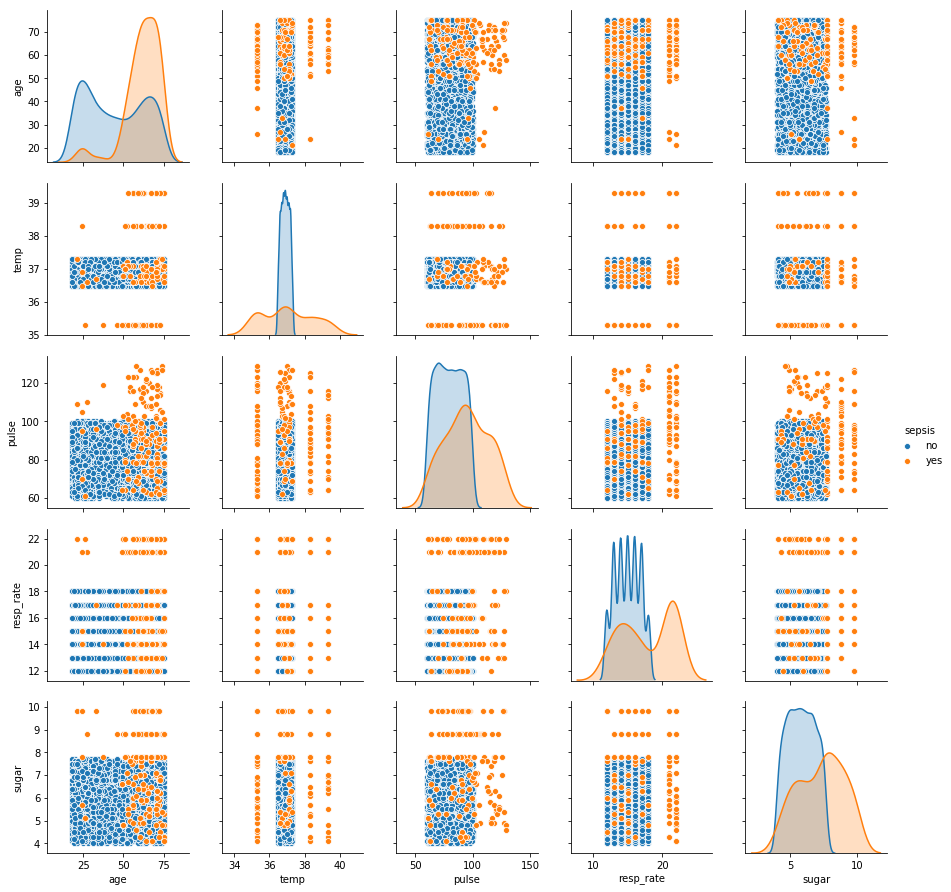

In [34]:
sns.pairplot(df, hue='sepsis')

In [35]:
x['temp']

789     39.3
901     39.3
1791    37.2
2243    37.1
1375    38.3
1291    39.3
317     38.3
3499    35.3
3271    38.3
2125    39.3
555     38.3
3119    35.3
981     37.1
2429    37.1
2361    37.1
1983    35.3
1867    35.3
395     37.0
1913    38.3
2941    35.3
2471    37.0
1435    38.3
407     36.7
597     39.3
219     35.3
2043    35.3
1031    36.7
2867    35.3
1427    35.3
5       36.6
        ... 
1517    37.3
3417    37.0
1097    35.3
1477    37.2
2895    37.0
1751    35.3
263     35.3
117     37.1
2089    36.8
1444    35.3
3201    36.6
959     36.5
1229    36.9
2399    35.3
2919    39.3
1356    36.6
1       37.0
1747    38.3
1797    35.3
1274    37.3
49      37.3
2854    35.3
1049    36.6
3330    36.5
767     38.3
2276    36.7
1936    36.9
2307    35.3
2318    38.3
2936    35.3
Name: temp, Length: 150, dtype: float64

In [36]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

In [37]:
inputs=df[['age', 'temp', 'pulse', 'resp_rate', 'sugar']]
outputs=df['sepsis']

In [38]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [39]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
knn.predict(inputs_test)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [42]:
knn.predict(inputs_test) == outputs_test

834      True
615      True
1599    False
520      True
1373     True
2653     True
1261     True
1715     True
1306     True
2332     True
3270     True
3152     True
1944     True
2462     True
1298     True
1759     True
481      True
2578     True
2387     True
942      True
2809     True
380      True
282      True
2353     True
3138     True
2176     True
3097     True
741      True
3415     True
2281     True
        ...  
2712     True
1850     True
1312     True
1140     True
1302     True
580      True
1577     True
1414     True
2486     True
1961     True
819      True
1934     True
649      True
3372     True
2407     True
2638     True
2424     True
2028     True
1320     True
1412     True
1287     True
1129     True
2944     True
665      True
2675     True
1165     True
51       True
1110     True
1051     True
532      True
Name: sepsis, Length: 1155, dtype: bool

In [43]:
(knn.predict(inputs_test) == outputs_test).sum()

1133